<a href="https://colab.research.google.com/github/djadczak956/MA4635/blob/main/Jadczak_Damian_HW3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Generate Simulated Dataset (a)


In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

## Scatterplot of Simulated Data (b)

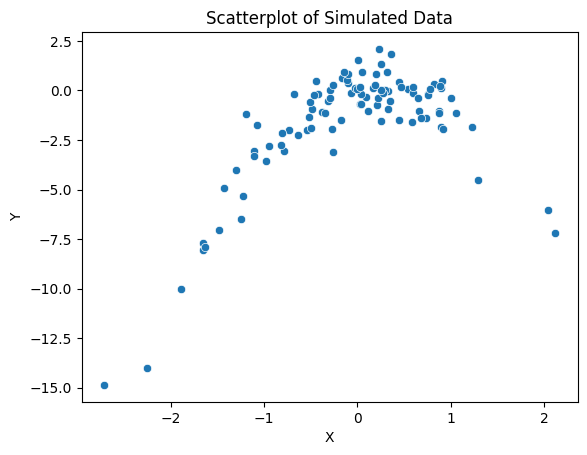

In [3]:
sns.scatterplot(x=x, y=y)
plt.title("Scatterplot of Simulated Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## LOOCV (c)

In [4]:
np.random.seed(42)

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

df = pd.DataFrame({'y': y, 'x': x})
df['x**2'] = df['x']**2
df['x**3'] = df['x']**3
df['x**4'] = df['x']**4
models = [
  smf.ols(formula='y ~ x', data=df).fit(),
  smf.ols(formula='y ~ x + I(x**2)', data=df).fit(),
  smf.ols(formula='y ~ x + I(x**2) + I(x**3)', data=df).fit(),
  smf.ols(formula='y ~ x + I(x**2) + I(x**3) + I(x**4)', data=df).fit()
]

In [6]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo_scores = []

for model in models:
    scores = []
    for train_index, test_index in loo.split(df):
        X_train, X_test = df.drop('y', axis=1).iloc[train_index], df.drop('y', axis=1).iloc[test_index]
        y_train, y_test = df['y'].iloc[train_index], df['y'].iloc[test_index]

        model_fit = smf.ols(formula=model.model.formula, data=pd.concat([X_train, y_train], axis=1)).fit()
        y_pred = model_fit.predict(X_test)
        scores.append(np.mean((y_test - y_pred)**2)) # MSE from (2.5)

    loo_scores.append(scores)

for i, scores in enumerate(loo_scores):
    print(f"Model {i+1}'s Mean LOOCV score (MSE): {np.mean(scores)}")

Model 1's Mean LOOCV score (MSE): 6.633029839181983
Model 2's Mean LOOCV score (MSE): 1.1229368563419686
Model 3's Mean LOOCV score (MSE): 1.3017965489358878
Model 4's Mean LOOCV score (MSE): 1.332394269417931


## Different Seed (d)

In [7]:
np.random.seed(15)

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# The most important part!!
models = [
  smf.ols(formula='y ~ x', data=df).fit(),
  smf.ols(formula='y ~ x + I(x**2)', data=df).fit(),
  smf.ols(formula='y ~ x + I(x**2) + I(x**3)', data=df).fit(),
  smf.ols(formula='y ~ x + I(x**2) + I(x**3) + I(x**4)', data=df).fit()
]

loo = LeaveOneOut()
loo_scores = []

for model in models:
    scores = []
    for train_index, test_index in loo.split(df):
        X_train, X_test = df.drop('y', axis=1).iloc[train_index], df.drop('y', axis=1).iloc[test_index]
        y_train, y_test = df['y'].iloc[train_index], df['y'].iloc[test_index]

        model_fit = smf.ols(formula=model.model.formula, data=pd.concat([X_train, y_train], axis=1)).fit()
        y_pred = model_fit.predict(X_test)
        scores.append(np.mean((y_test - y_pred)**2)) # MSE from (2.5)

    loo_scores.append(scores)

for i, scores in enumerate(loo_scores):
    print(f"Model {i+1}'s Mean LOOCV score (MSE): {np.mean(scores)}")

Model 1's Mean LOOCV score (MSE): 6.633029839181983
Model 2's Mean LOOCV score (MSE): 1.1229368563419686
Model 3's Mean LOOCV score (MSE): 1.3017965489358878
Model 4's Mean LOOCV score (MSE): 1.332394269417931
